# Pytorch

# Make basic forward network

In [1]:
import torch

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    
    def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [4]:
torch.manual_seed(32)
model = Model()

# Load up Iris datatset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [28]:
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

In [20]:
df = pd.DataFrame(X, columns=feature_names)

In [22]:
df["target"] = y

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


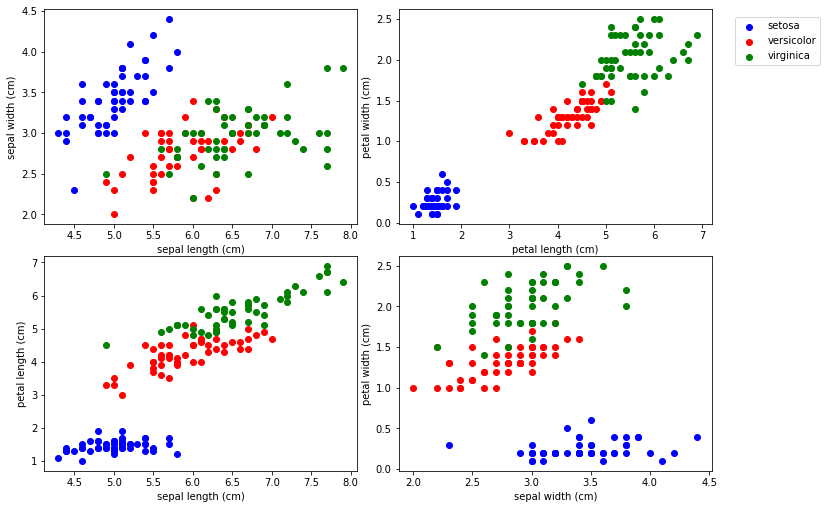

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout()

# Sets up 4 separate plots
plots = [(0,1), (2,3), (0,2), (1,3)]
colors = ['b', 'r', 'g']
labels = list(names)

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df["target"]==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0, 0.85))
plt.show()

In [35]:
X = df.drop('target', axis=1)
y = df['target']

In [37]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Convert pandas to torch tensors

In [49]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

In [50]:
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [52]:
criterion = nn.CrossEntropyLoss()

In [53]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [55]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

# Train Pytorch model

In [70]:
epochs = 100
losses = []

for i in range(epochs):
    
    # forward and get prediction
    y_pred = model.forward(X_train)
    
    # calculate loss/error
    loss = criterion(y_pred, y_train)
    
    losses.append(loss.item())
    
    if i%10==0:
        print(f'Epoch {i} and loss is {loss}')
        
    # backpropagation 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is 0.07016561180353165
Epoch 10 and loss is 0.06624820083379745
Epoch 20 and loss is 0.06345286220312119
Epoch 30 and loss is 0.06128561496734619
Epoch 40 and loss is 0.05952828377485275
Epoch 50 and loss is 0.0580664686858654
Epoch 60 and loss is 0.05683038383722305
Epoch 70 and loss is 0.05577214062213898
Epoch 80 and loss is 0.054856281727552414
Epoch 90 and loss is 0.05405646935105324


Text(0.5, 0, 'Epoch')

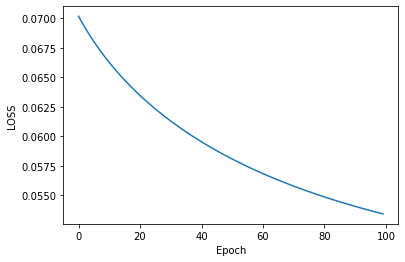

In [71]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')